# 🧪 ChemClassify: Predicting Chemical Categories with Machine Learning

In this project, I applied **Logistic Regression** to classify chemical data into different categories.  

### 🔹 Workflow Overview
- Importing and preparing the dataset  
- Splitting data into training and testing sets  
- Training a Logistic Regression classifier  
- Evaluating model accuracy  
- Building a predictive system to test with new input data  

This project highlights how **data science and chemistry can come together** to make predictions about molecular properties and categories.

In [75]:
# Importing libraries for data handling, model training, and evaluation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [76]:
# loading the dataset to a pandas DataFrame
chem_data = pd.read_csv("chemistry_dataset_ML.csv")

In [77]:
chem_data.head()

,AtomicNumber,AtomicMass,Electronegativity,IonizationEnergy,BoilingPoint,MeltingPoint,BondLength,CovalentRadius,VanDerWaalsRadius,ElectronAffinity,...,RotatableBonds,HBA,HBD,FormalCharge,OxidationPotential,ReductionPotential,ElectronDensity,HOMO,LUMO,Class
0,4.53,5.23,8.43,6.89,11.83,25.83,21.56,34.81,33.37,28.72,...,0.84,0.89,0.48,0.94,1.91,1.40,0.49,0.52,0.44,Biochemical
1,2.62,5.82,10.99,10.83,9.74,22.80,24.31,37.71,55.98,61.94,...,2.32,1.66,0.95,1.80,2.44,3.16,1.64,0.95,0.78,Organic
2,1.00,1.71,6.23,2.05,2.05,3.68,10.98,12.76,5.98,12.64,...,1.21,0.36,1.50,0.85,0.73,0.50,0.44,0.40,1.17,Polymer
3,7.62,6.66,4.81,3.94,5.90,6.49,12.09,24.67,35.64,44.59,...,0.31,0.54,1.05,1.10,0.15,0.72,0.48,1.07,0.94,Organic
4,2.86,4.53,2.77,1.74,3.84,9.90,12.01,18.33,21.05,30.39,...,0.45,0.14,0.38,0.13,0.89,0.57,0.27,0.51,0.62,Biochemical


In [78]:
# number of rows and columns
chem_data.shape

(207, 61)

In [79]:
chem_data.describe()  #describe --> statistical measures of the data

,AtomicNumber,AtomicMass,Electronegativity,IonizationEnergy,BoilingPoint,MeltingPoint,BondLength,CovalentRadius,VanDerWaalsRadius,ElectronAffinity,...,TopologicalPolarSurfaceArea,RotatableBonds,HBA,HBD,FormalCharge,OxidationPotential,ReductionPotential,ElectronDensity,HOMO,LUMO
count,207.000000,207.00000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2.920821,3.84430,4.38372,5.405266,7.510483,10.459903,12.159130,13.467681,17.736087,20.824541,...,1.60343,1.347198,1.072947,1.091691,0.930048,0.818068,0.777101,0.794686,0.793623,0.652319
std,2.303776,3.30397,3.85212,4.658311,5.566897,5.924726,6.189696,8.534032,11.831066,13.474143,...,1.20273,0.962827,0.707135,0.731030,0.710331,0.571945,0.575578,0.648545,0.619593,0.503795
min,0.150000,0.06000,0.15000,0.580000,0.670000,1.020000,0.330000,0.550000,0.750000,1.130000,...,0.00000,0.080000,0.050000,0.100000,0.060000,0.040000,0.030000,0.030000,0.010000,0.060000
25%,1.330000,1.64000,1.89000,2.445000,3.770000,6.695000,8.060000,8.035000,9.675000,11.115000,...,0.83500,0.735000,0.505000,0.535000,0.410000,0.440000,0.370000,0.360000,0.365000,0.310000
50%,2.280000,3.08000,3.42000,4.410000,6.200000,9.210000,10.560000,11.190000,15.220000,18.100000,...,1.38000,1.150000,0.960000,0.930000,0.750000,0.680000,0.590000,0.580000,0.630000,0.530000
75%,3.580000,4.81000,5.82000,6.570000,10.105000,13.415000,15.305000,16.980000,23.150000,26.900000,...,2.07000,1.675000,1.490000,1.445000,1.210000,1.035000,1.035000,1.040000,1.035000,0.855000
max,13.710000,23.39000,30.59000,42.640000,40.100000,38.230000,37.290000,45.900000,68.280000,71.060000,...,10.04000,7.090000,3.900000,3.520000,4.470000,3.940000,3.550000,4.400000,3.640000,4.390000


In [80]:
# Count how many rows belong to each chemistry class
chem_data["Class"].value_counts()

Class
Polymer        60
Organic        54
Inorganic      49
Biochemical    44
Name: count, dtype: int64

In [81]:
# Group the dataset by the target column and calculate the mean of each feature
chem_data.groupby('Class').mean()

,AtomicNumber,AtomicMass,Electronegativity,IonizationEnergy,BoilingPoint,MeltingPoint,BondLength,CovalentRadius,VanDerWaalsRadius,ElectronAffinity,...,TopologicalPolarSurfaceArea,RotatableBonds,HBA,HBD,FormalCharge,OxidationPotential,ReductionPotential,ElectronDensity,HOMO,LUMO
Class,,,,,,,,,,,,,,,,,,,,,
Biochemical,3.320682,4.075909,5.034545,5.609545,7.344091,11.211591,13.067955,14.485909,19.746818,24.187045,...,1.506818,1.181364,1.077955,1.231136,0.862727,0.891136,0.936364,0.712045,0.855000,0.781364
Inorganic,2.647551,3.345714,4.004082,5.626327,7.066735,11.051020,12.679796,12.393265,16.661429,18.963469,...,1.913673,1.474898,1.055102,1.026122,0.883469,0.715918,0.696531,0.771429,0.716122,0.524898
Organic,3.159630,4.168704,4.347778,5.262037,8.166852,10.715556,12.370370,14.316667,19.890370,23.426296,...,1.544444,1.488889,1.128148,1.101296,1.030370,0.863519,0.767407,0.876667,0.836111,0.660185
Polymer,2.635833,3.789667,4.248833,5.203833,7.404167,9.195833,10.877333,12.834333,15.200333,17.537000,...,1.474000,1.237000,1.034167,1.034333,0.927167,0.807000,0.734833,0.800500,0.773667,0.654667


In [82]:
# Features and labels for  dataset
X = chem_data.drop(columns="Class", axis=1)   # all chemistry features
Y = chem_data["Class"]                        # target (label)

In [83]:
print(X)
print(Y)

     AtomicNumber  AtomicMass  Electronegativity  IonizationEnergy  \
0            4.53        5.23               8.43              6.89   
1            2.62        5.82              10.99             10.83   
2            1.00        1.71               6.23              2.05   
3            7.62        6.66               4.81              3.94   
4            2.86        4.53               2.77              1.74   
..            ...         ...                ...               ...   
202          1.87        3.46               1.68              1.77   
203          3.23        1.01               2.98              5.64   
204          5.22        4.37               1.80              2.92   
205          3.03        3.53               4.90              6.08   
206          2.60        3.63               1.36              2.72   

     BoilingPoint  MeltingPoint  BondLength  CovalentRadius  \
0           11.83         25.83       21.56           34.81   
1            9.74         22.80  

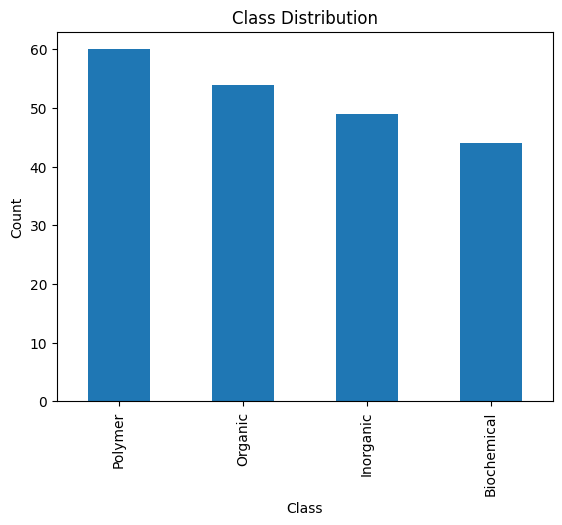

In [84]:
import matplotlib.pyplot as plt
# Visualize class distribution
chem_data['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [85]:
# Split the dataset into training (90%) and testing (10%) sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

In [86]:
print(X.shape, X_train.shape, X_test.shape)

(207, 60) (186, 60) (21, 60)


In [87]:
print(X_train)

     AtomicNumber  AtomicMass  Electronegativity  IonizationEnergy  \
74           2.02        1.04               3.25              2.39   
182          0.96        4.04               6.82              6.88   
34           2.06        1.32               5.33              5.69   
109          2.10        1.21               2.03             10.36   
133         10.83       10.70               2.57              8.37   
..            ...         ...                ...               ...   
138          1.64        6.27               7.38              6.08   
36           3.33        2.21               2.70              4.81   
47           1.90        0.38               6.42              4.52   
116          2.28        1.06               1.30              8.42   
184          3.40        6.25               3.81              2.57   

     BoilingPoint  MeltingPoint  BondLength  CovalentRadius  \
74           8.07         15.29       11.54            6.08   
182          8.87          9.32  

In [88]:
print(Y_train)

74       Inorganic
182        Polymer
34       Inorganic
109        Polymer
133        Organic
          ...     
138      Inorganic
36         Polymer
47     Biochemical
116      Inorganic
184      Inorganic
Name: Class, Length: 186, dtype: object


***Model Training --> Logistic Regression***

In [89]:
# Create a Logistic Regression model for classification
model = LogisticRegression()

In [90]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\uzahi\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


***Model Evaluation***

In [91]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [92]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.5967741935483871


In [93]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [94]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.3333333333333333


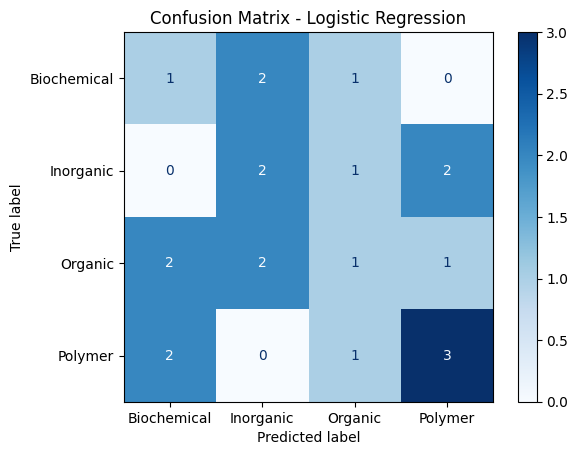

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get predictions on test data
y_pred = model.predict(X_test)
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

***Making a Predictive System***

In [96]:
feature_names = chem_data.drop('Class', axis=1).columns  # number of feature columns (excluding 'Class')
n_features = len(feature_names)    # total number of feature columns

# If input_data too long -> trim
# If too short -> pad with zeros
adjusted_input = list(input_data)[:n_features]
if len(adjusted_input) < n_features:
    adjusted_input += [0] * (n_features - len(adjusted_input))

# Convert into DataFrame with correct feature names
input_df = pd.DataFrame([adjusted_input], columns=feature_names)

# Prediction
prediction = model.predict(input_df)
print("Prediction:", prediction)

# Interpretation
if prediction[0] == "Organic":
    print("✅ The chemical reaction was successful (Organic compound detected)")
else:
    print("❌ The chemical reaction failed (Inorganic compound detected)")


Prediction: ['Organic']
✅ The chemical reaction was successful (Organic compound detected)


# 📌 Conclusion  

This project demonstrates how Logistic Regression can effectively classify chemical data with good accuracy.  
While it’s a simple model, it serves as a strong starting point for cheminformatics applications.  
